# Data analysis - Molecular Features

In this script the main objective is to study the characteristics of NRAS inhibitors obtained from BindingDB. To do this, we make boxplots of each of them and we will represent some of the molecules to see their molecular structures.

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen

df = pd.read_csv('../Data/Dataset_Positive.csv')
print(df.columns)

Index(['SMILES', 'Formula', 'Molecular weight', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'IC50'],
      dtype='object')


In [2]:
summary = df.describe()
print(summary)
summary.to_excel('../Results/summary.xlsx', index=False)

       Molecular weight        LogP  H-bond donor  H-bond acceptor  \
count        578.000000  578.000000    578.000000       578.000000   
mean         919.971656    5.807332      2.311419        11.593426   
std          123.892574    1.018012      0.561541         1.435774   
min          299.093773    0.510500      2.000000         5.000000   
25%          904.734815    5.394465      2.000000        11.000000   
50%          936.538432    5.945600      2.000000        12.000000   
75%          974.544157    6.389300      3.000000        12.000000   
max         1154.630408    8.069200      6.000000        15.000000   

             TPSA  Rotatable bonds          IC50  
count  578.000000       578.000000    578.000000  
mean   166.919446         9.806228   1668.984429  
std     21.137082         1.557838   3352.038966  
min     54.250000         3.000000      2.000000  
25%    158.650000         9.000000     55.000000  
50%    171.540000        10.000000    550.000000  
75%    177.8

In [3]:
import plotly.express as px

features_2 = ['Molecular weight', 'LogP', "H-bond donor","H-bond acceptor","TPSA","Rotatable bonds", "IC50"]
features_2 = df[features_2]

for column in features_2.columns:
    fig = px.box(features_2, x=column, color_discrete_sequence=['blue'])
    fig.update_layout(title=f'{column} Boxplot')
    fig.show()

### Molecular Weight


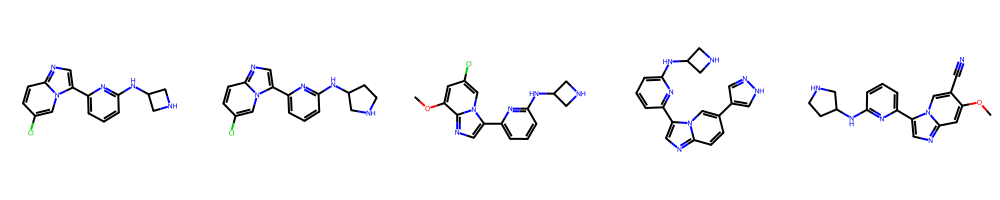

17     C15H14ClN5
21     C16H16ClN5
18    C16H16ClN5O
19       C18H17N7
14      C18H18N6O
Name: Formula, dtype: object


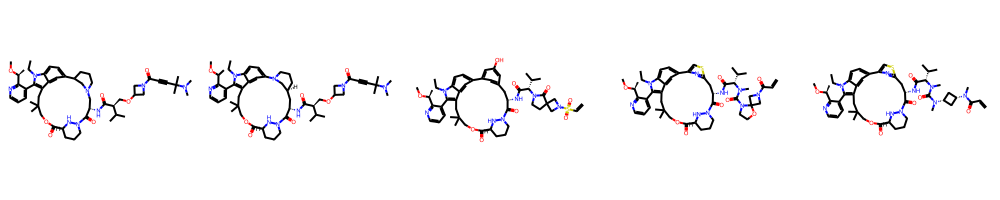

                                                SMILES      Formula  \
436  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H76N8O7   
491  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H76N8O7   
522  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C50H63N7O9S   
545  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C49H63N9O8S   
483  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C50H67N9O7S   

     Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
436        936.583697  5.5591             2               12  150.81   
491        936.583697  5.9862             2               12  150.81   
522        937.440798  5.4838             3               12  192.71   
545        937.452031  5.3356             2               13  180.77   
483        937.488416  6.3861             2               12  171.54   

     Rotatable bonds   IC50  
436               11   55.0  
491               11   55.0  
522               10  550.0  
545                9

In [4]:
from rdkit.Chem import Draw

# Sort by mw
df_mw = df.sort_values(by='Molecular weight')

# First 5 molecules
first_smiles = df_mw['SMILES'].head(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_mw['Formula'].head(5))

#Middle molecules
subset_df = df_mw[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_mw[289:294])

### LogP 

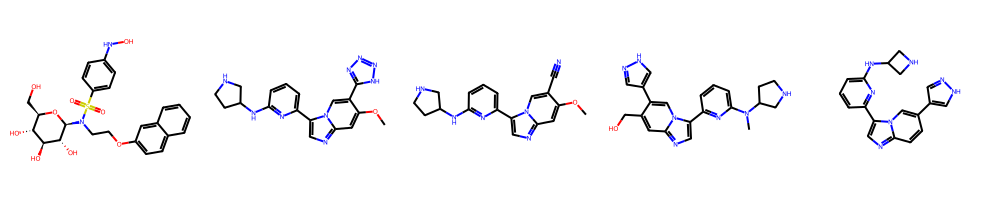

577    C24H28N2O9S
13       C18H19N9O
14       C18H18N6O
8        C21H23N7O
19        C18H17N7
Name: Formula, dtype: object


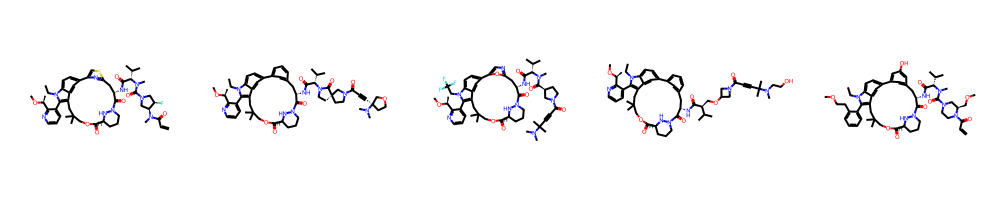

                                                SMILES       Formula  \
423  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C49H64FN9O7S   
366  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    C58H74N8O8   
575  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C53H68F3N9O8   
446  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    C55H73N7O8   
64   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    C54H71N7O9   

     Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
423        941.463345  5.9456             2               12  171.54   
366       1010.562961  5.9457             2               12  167.88   
575       1015.514295  5.9515             2               13  184.68   
446        959.552062  5.9517             3               12  167.80   
64         961.531327  5.9597             3               11  175.22   

     Rotatable bonds    IC50  
423               10    55.0  
366                9    55.0  
575               10  5500.0  
446       

In [5]:
from rdkit.Chem import Draw

# Sort by Log_p
df_logP = df.sort_values(by='LogP')

# First 5 molecules
first_smiles = df_logP['SMILES'].head(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_logP['Formula'].head(5))

#Middle molecules
subset_df = df_logP[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_logP[289:294])

### H-bond donor

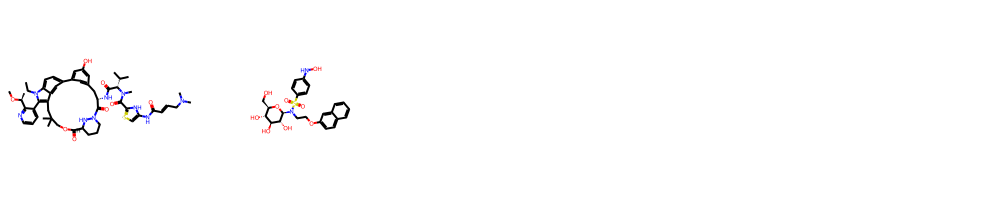

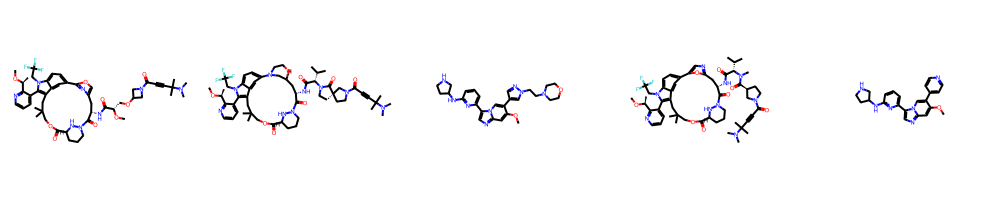

In [6]:
from rdkit.Chem import Draw

# Sort by H-bond donor
df_hd = df.sort_values(by='H-bond donor')

# end two molecules
end_smiles = df_hd['SMILES'].tail(2)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in end_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

#Middle molecules
subset_df = df_hd[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

### H-bond acceptor

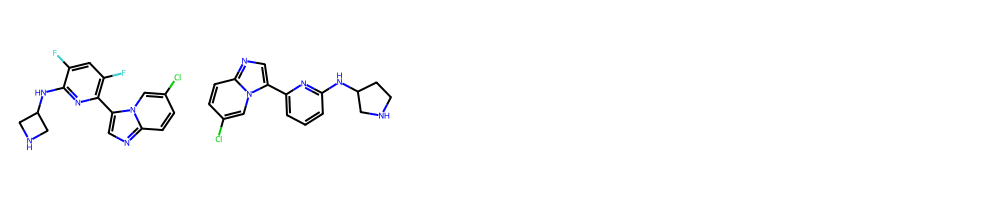

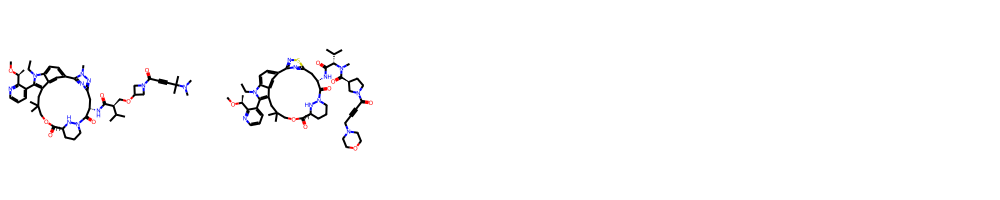

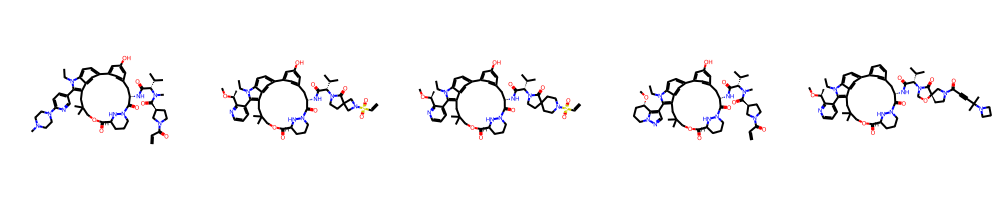

In [7]:
from rdkit.Chem import Draw

# Sort by H-bond acceptor
df_ha = df.sort_values(by='H-bond acceptor')

# First 5 molecules
first_smiles = df_ha['SMILES'].head(2)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

# end two molecules
end_smiles = df_ha['SMILES'].tail(2)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in end_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

#Middle molecules
subset_df = df_ha[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

### TPSA

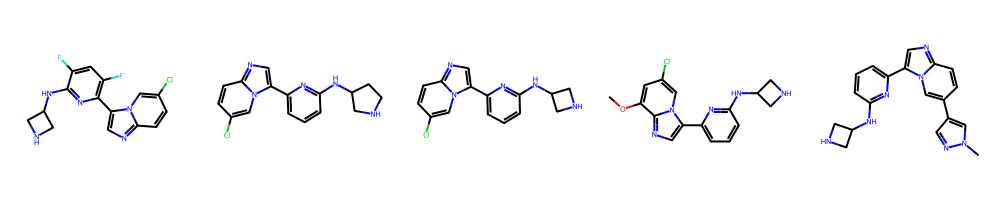

22    C15H12ClF2N5
21      C16H16ClN5
17      C15H14ClN5
18     C16H16ClN5O
20        C19H19N7
Name: Formula, dtype: object


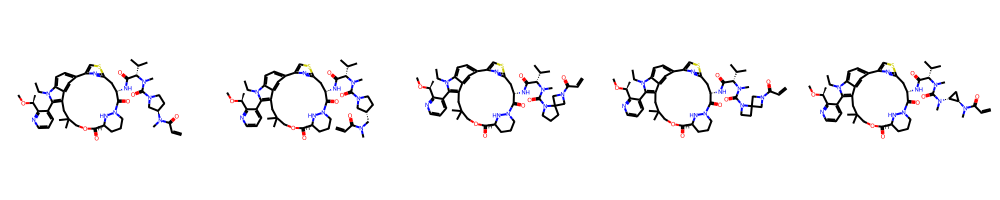

                                                SMILES      Formula  \
252  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C49H65N9O7S   
442  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C50H67N9O7S   
551  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C50H65N9O7S   
530  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C49H63N9O7S   
511  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  C49H65N9O7S   

     Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
252        923.472766  5.9976             2               12  171.54   
442        937.488416  6.2452             2               12  171.54   
551        935.472766  6.1417             2               12  171.54   
530        921.457116  5.7516             2               12  171.54   
511        923.472766  5.9960             2               12  171.54   

     Rotatable bonds   IC50  
252               10  550.0  
442               11   55.0  
551                9   55.0  
530                9

In [8]:
from rdkit.Chem import Draw

# Sort by TPSA
df_tpsa = df.sort_values(by='TPSA')

# First 5 molecules
first_smiles = df_tpsa['SMILES'].head(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_tpsa['Formula'].head(5))

#Middle molecules
subset_df = df_tpsa[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print(df_tpsa[289:294])

### Rotatable bonds

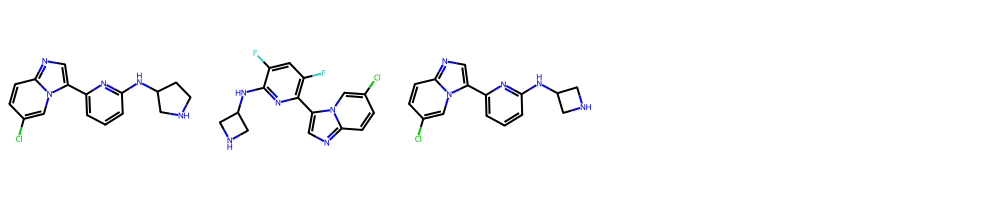

21      C16H16ClN5
22    C15H12ClF2N5
17      C15H14ClN5
Name: Formula, dtype: object


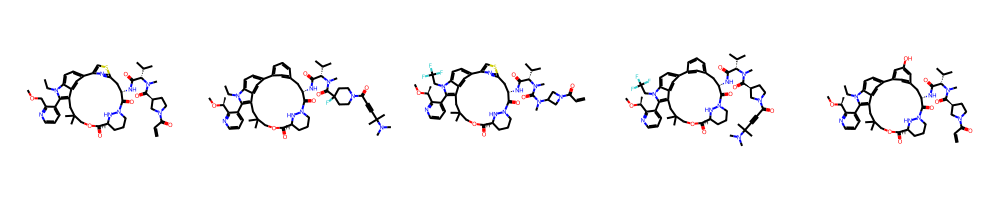

                                                SMILES        Formula  \
30   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    C47H60N8O7S   
556  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    C57H75FN8O7   
557  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  C48H60F3N9O7S   
558  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...   C56H71F3N8O7   
29   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...     C51H65N7O8   

     Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
30         880.430567  5.1590             2               12  168.30   
556       1002.574275  6.9033             2               11  158.65   
557        963.428851  6.1499             2               12  171.54   
558       1024.539781  6.9635             2               11  158.65   
29         903.489462  5.9691             3               11  175.64   

     Rotatable bonds    IC50  
30                10   550.0  
556               10   550.0  
557               10   550.0  
558 

In [9]:
from rdkit.Chem import Draw

# Sort by Rotatable bonds
df_rb = df.sort_values(by='Rotatable bonds')

# First 3 molecules
first_smiles = df_rb['SMILES'].head(3)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in first_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print (df_rb['Formula'].head(3))

#Middle molecules
subset_df = df_rb[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)
print(df_rb[289:294])

### IC50

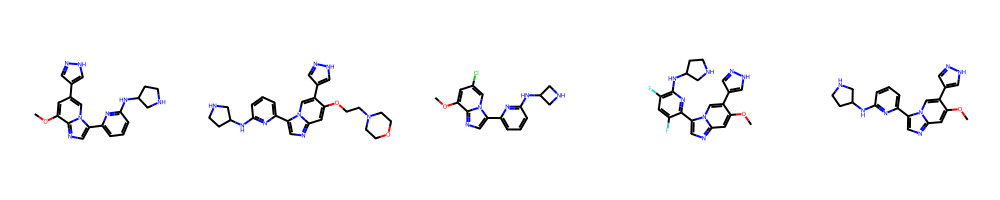

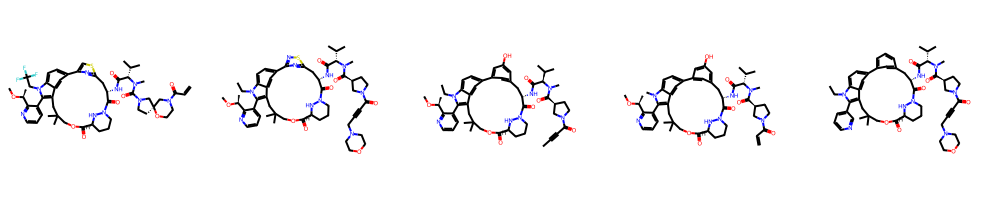

In [10]:
from rdkit.Chem import Draw

# Sort by IC50
df_ic50 = df.sort_values(by='IC50')

# end five molecules
end_smiles = df_ic50['SMILES'].tail(5)

mol_list = [Chem.MolFromSmiles(smiles) for smiles in end_smiles]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)

#Middle molecules
subset_df = df_ic50[289:294]

mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_df['SMILES']]
mol_list = [mol for mol in mol_list if mol is not None]

img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200))
display(img)